In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [27]:
%matplotlib inline

# Problem Set 5

### PHYS 441

***

Adam A Miller  
30 November 2023  
version 0.2

Problem sets for Phys 441 are due 1 week after they are assigned at 11:59 pm. 

Every student is responsible for submitting their own *individual* solutions. Solutions must be either an executable jupyter notebook or Adobe PDF file submitted via Canvas. You must **show all your work**. Submissions that only include answers will have points deducted.

If the problem set calls for an integral, please calculate the integral by hand (in general any problem with integrals will not require the use of mathematica or similar tools).

If you wish to "write mathematics" in a Jupyter notebook, this can be done using LaTeX formatting.

LaTeX is great at typesetting mathematics. Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed random variables with $\text{E}[X_i] = \mu$ and $\text{Var}[X_i] = \sigma^2 < \infty$, and let

$$S_n = \frac{X_1 + X_2 + \cdots + X_n}{n}
      = \frac{1}{n}\sum_{i}^{n} X_i\$$
      
denote their mean. Then as $n$ approaches infinity, the random variables $\sqrt{n}(S_n - \mu)$ converge in distribution to a normal $\mathcal{N}(0, \sigma^2)$.

You can find a [summary of all the LaTeX math symbols](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols) from Overleaf. 

## New note

**If you submit a jupyter notebook as a pdf MAKE SURE the pdf shows all the text/code within the cells. Lines of code that are very long do not automatically "wrap" when exporting to pdf**

## Problem 1) 12 points

The function $f(x) = \frac{\sin x}{x}$ has no closed form solution for its integral. 

**Problem 1a**

Using the accept-reject method, draw 1000 random samples from the p.d.f. 

$$f(x; \alpha) = \begin{cases} 0.53997\frac{\sin x}{x} & \text{$0 \leq x \leq \pi$} \\
 0 & \text{otherwise} \end{cases}$$

(Note - the factor of 0.53997 is needed to normalize the p.d.f.)

Plot a histogram of the 1000 random samples and overplot the analytic form of the p.d.f.

*Hint* – be sure to normalize the histogram so that it integrates to 1.

/var/folders/mz/znfhl70963d19m5pmpb4zftr0000gn/T/ipykernel_15206/2904567707.py:9: RuntimeWarning: invalid value encountered in scalar divide
  y_axis = list(map(lambda x: 0.53997*(np.sin(x)/x) , x_axis))


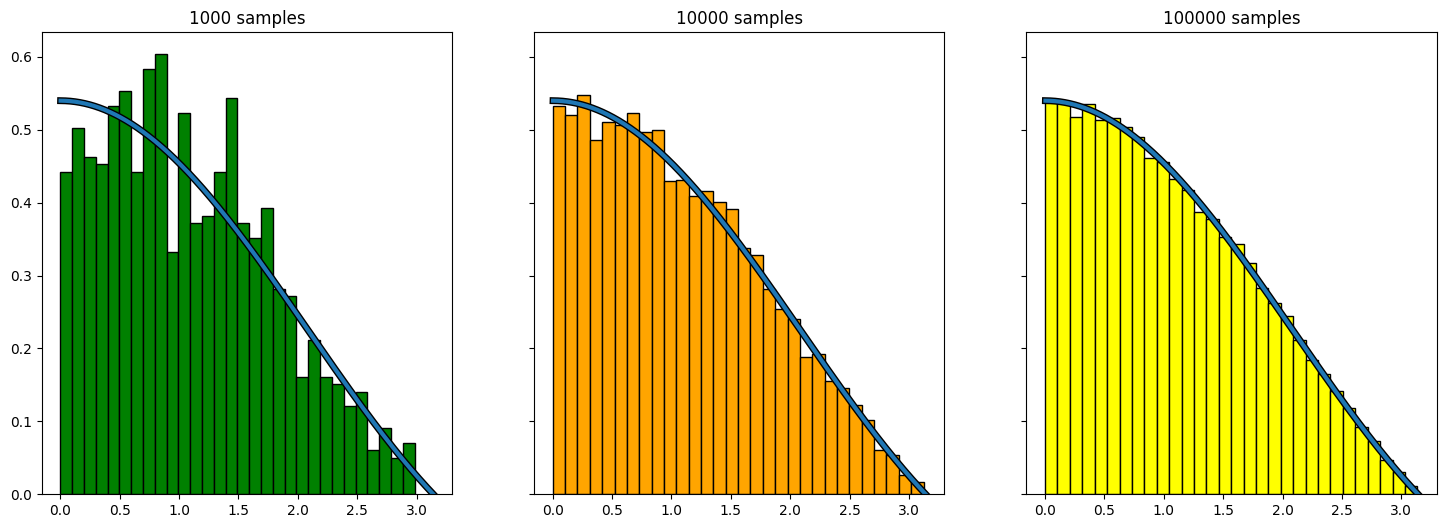

In [28]:
import math 
import random 
import numpy as np 
import scipy.stats as stats  
import matplotlib.patheffects as pe 

# data points for the pdf curve 
x_axis = np.linspace(0, math.pi, 1000)
y_axis = list(map(lambda x: 0.53997*(np.sin(x)/x) , x_axis))

def sample(size=1000):
    f = lambda x: 0.53997*(np.sin(x)/x) 
    f_max = 0.53997 
    x_min = 0 
    x_max = np.pi 

    rtn = [] 
    while len(rtn) < size:
        r1, r2 = random.random(), random.random() 
        x, u = x_min + r1*(x_max-x_min), r2*f_max 
        if f(x)>u: rtn.append(x)
    
    return np.array(rtn)
   
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True) 
ax[0].plot(x_axis, y_axis, lw=3, path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()]) 
ax[0].hist(sample(size=1000), bins=30, color='green', edgecolor='black', density=True)
ax[0].set_title('1000 samples')
ax[1].plot(x_axis, y_axis, lw=3, path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()]) 
ax[1].hist(sample(size=10000), bins=30, color='orange', edgecolor='black', density=True)
ax[1].set_title('10000 samples')
ax[2].plot(x_axis, y_axis, lw=3, path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()]) 
ax[2].hist(sample(size=100000), bins=30, color='yellow', edgecolor='black', density=True)
ax[2].set_title('100000 samples')
plt.show() 


**Problem 1b**

Using the accept-reject method calculate the integral of $\frac{\sin x}{x}$ from $x = 0$ to $\pi$ and in doing so confirm the normalization factor for the p.d.f.

Report a solution that is accurate to the first two decimal places. How do you know your answer satisfies this criteria?

*Note* – you **must** use accept-reject to determine the answer. Other tools (including mathematica or numerical integration with scipy) will not be accepted for credit. 

In [29]:
print('The integral of C*sin(x)/x over 0 to pi should be 1, which is the definition of a pdf.') 
print('We need to find C here')

def get_area_under_curve(size=1000):
    f = lambda x: 1*(np.sin(x)/x) 
    f_max = 1
    x_min = 0 
    x_max = np.pi 

    i = 0 
    n_accept = 0 
    while i < size:
        r1, r2 = random.random(), random.random() 
        x, u = x_min + r1*(x_max-x_min), r2*f_max 
        if f(x)>u: n_accept +=1 
        i += 1 
    return (n_accept/size) * ((x_max-x_min)*f_max)

area = get_area_under_curve(size=1000000) 

print(f'The integral of sin(x)/x is {area}. To normalize this to 1, we need to C*{area} to be 1.')
print(f'Hence, C = 1/area, which is {1/area}') 


The integral of C*sin(x)/x over 0 to pi should be 1, which is the definition of a pdf.
We need to find C here
The integral of sin(x)/x is 1.849066037679266. To normalize this to 1, we need to C*1.849066037679266 to be 1.
Hence, C = 1/area, which is 0.5408135672942673


## Problem 2) 15 points

**Problem 2a**

Execute the cell below to create 3 arrays describing observations $y$ with uncertainties $\sigma_y$. The observed $y$ values depend upon an independent variable $x$.

Make a scatter plot of the observations and display their uncertainties.

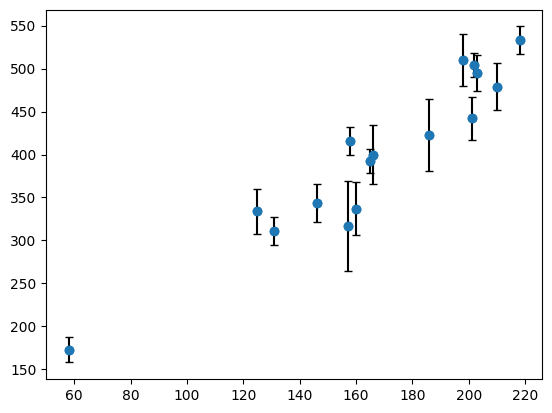

In [30]:
x = np.array([203, 58, 210, 202, 198, 158, 
              165, 201, 157, 131, 166, 160, 
              186, 125, 218, 146])
y = np.array([495, 173, 479, 504, 510, 416, 
              393, 442, 317, 311, 400, 337, 
              423, 334, 533, 344])
sigma_y = np.array([21, 15, 27, 14, 30, 16, 
                    14, 25, 52, 16, 34, 31, 
                    42, 26, 16, 22])

fig, ax = plt.subplots()

ax.scatter(x, y)
ax.errorbar(x, y, yerr=sigma_y, fmt="o", ecolor='black', capsize=3)

plt.show() 


In class we showed that the method of least squares can be solved analytically via linear algebra. If we define: 

$$ \mathbf{Y} = \left[ {\begin{array}{c}
            y_1 \\
            y_2 \\
            \dots \\
            y_N
            \end{array}
           }
            \right] , $$

$$ \mathbf{A} = \left[ {\begin{array}{cc}
            1 & x_1 \\
            1 & x_2 \\
            \dots & \dots \\
            1 & x_N
            \end{array}
           }
           \right] ,
           $$
           
$$ \mathbf{V} = \left[ {\begin{array}{cccc}
            \sigma_{y_1}^2 & 0 & \dots & 0 \\
            0 & \sigma_{y_2}^2 & \dots & 0 \\
            \vdots & \vdots & \ddots & \vdots \\
            0 & 0 & \dots & \sigma_{y_1}^2 \\
            \end{array}
           }
           \right] ,
           $$
           
where $\mathbf{Y}$ is a vector, and $\mathbf{V}$ is the covariance matrix. 


Then we want to solve the equations

$$\mathbf{Y} = \mathbf{A}\mathbf{\Theta}.$$

Again, from class we showed that this can be solved via: 

$$ \left[ {\begin{array}{c}
            b \\
            m \\
            \end{array}
           }
            \right] = \mathbf{X} = \left[ \mathbf{A}^T \mathbf{V}^{-1} \mathbf{A}\right]^{-1} \left[ \mathbf{A}^T \mathbf{V}^{-1} \mathbf{Y}\right].$$

**Problem 2b**

Using the linear algebra equations above, determine the weighted least-squares best-fit values for $b$ and $m$, the intercept and slope, respectively.

Plot the results of the best-fit line. How does it look?

(16, 2)
(16, 1)
(16, 16)
The best-fit value for the slope and intercept are: 2.2399 and 34.0477
The lines seems to fit the data pretty well


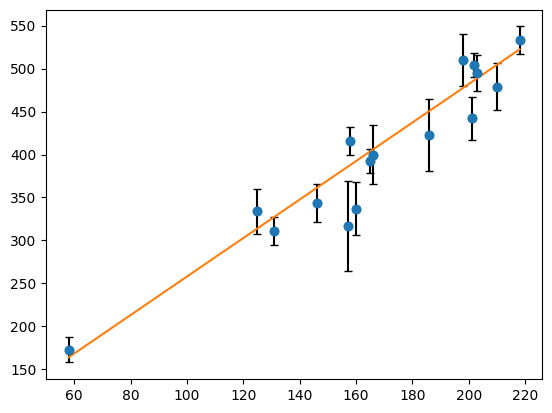

In [31]:
ones = np.array([1 for _ in range(len(x))]) 
A = np.vstack((ones, x)).T
print(A.shape)
Y = np.atleast_2d(y).T
print(Y.shape)
V = np.diag(sigma_y**2)
print(V.shape)

FIRST = A.T @ np.linalg.inv(V) @ A 
SECOND = A.T @ np.linalg.inv(V) @ Y 
RESULT = np.linalg.inv(FIRST) @ SECOND 
[[b], [m]] = RESULT 

x_axis = np.linspace(min(x), max(x), 1000)
y_axis = list(map(lambda _x: m*_x+b, x_axis))

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.errorbar(x, y, yerr=sigma_y, fmt="o", ecolor='black', capsize=3)
ax.plot(x_axis, y_axis)

print("The best-fit value for the slope and intercept are: {:.4f} and {:.4f}".format(RESULT[1][0], RESULT[0][0]))
print('The lines seems to fit the data pretty well')

**Problem 2c**

Calculate the $\chi^2$ for this fit. 

In [32]:
f = lambda _x: m*_x+b

# equation 7.3 
chi_sq_first = sum(((y - f(x))**2) / (sigma_y)**2) 

# equation 7.8 
chi_sq_mtx_first = (Y - A@RESULT).T @ np.linalg.inv(V) @ (Y - A@RESULT)
[[chi_sq_mtx_first]] = chi_sq_mtx_first

print(f'the chi^2 equals {chi_sq_first }') # complete  
print(f'the chi^2 calculated using matrix form equals {chi_sq_mtx_first}') 

the chi^2 equals 18.680769911240812
the chi^2 calculated using matrix form equals 18.6807699112408


**Problem 2d**

Using the same linear algebra techniques, fit a third order polynomial to the data. 

Plot the best-fit model over the data.

$ d + cx + bx^2 + ax^3$

(16, 4)
(16, 1)
(16, 16)


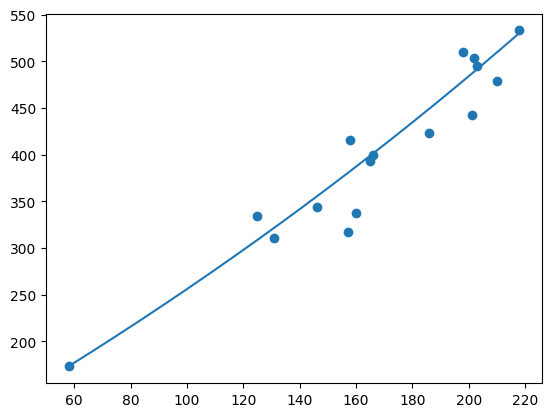

In [33]:
ones = np.array([1 for _ in range(len(x))]) 
A = np.vstack((ones, x, x**2, x**3)).T
print(A.shape)
Y = np.atleast_2d(y).T
print(Y.shape)
V = np.diag(sigma_y**2)
print(V.shape)

FIRST = A.T @ np.linalg.inv(V) @ A 
SECOND = A.T @ np.linalg.inv(V) @ Y 
RESULT = np.linalg.inv(FIRST) @ SECOND 
[[d], [c], [b], [a]] = RESULT

x_axis = np.linspace(min(x), max(x), 1000)
y_axis = list(map(lambda _x: a*_x**3 + b*_x**2 + c*_x**1 + d, x_axis))

fig, ax = plt.subplots()
ax.scatter(x, y)
# ax.errorbar(x, y, yerr=sigma_y, fmt="o", ecolor='black', capsize=3)
ax.plot(x_axis, y_axis)

plt.show()


**Problem 2e**

Calculate the $\chi^2$ for the third order polynomial model.

In [34]:
f = lambda _x: a*_x**3 + b*_x**2 + c*_x**1 + d

# equation 7.3 
chi_sq_third = sum(((y - f(x))**2) / (sigma_y)**2) 

# equation 7.8 
chi_sq_mtx_third = (Y - A@RESULT).T @ np.linalg.inv(V) @ (Y - A@RESULT)
[[chi_sq_mtx_third]] = chi_sq_mtx_third 

print(f'the chi^2 equals {chi_sq_third }') # complete  
print(f'the chi^2 calculated using matrix form equals {chi_sq_mtx_third}') 


the chi^2 equals 17.402640461012517
the chi^2 calculated using matrix form equals 17.402640461012524


**Problem 2f**

Which hypothesis do you prefer -  
A. the data can be explained via a first order polynomial in x  
B. the data can be explained via a third order polynomial in x

Why?

In [35]:
print("B, because the chi^2 value is lower.")

B, because the chi^2 value is lower.


## Problem 3) 18 points

As described in lecture, the likelihood is just the product of the probability of all the individual observations within a data set:

$$\mathcal{L}(\theta) \equiv \prod f(x_i;\theta)$$

**Probelm 3a**

Write a function `model` with two input parameters, `theta` and `x`, where `theta` is a tuple with values $\theta_0$ and $\theta_1$, and the function returns $\theta_0 + \theta_1 x$.

*Hint* – this is far more formal than necessary, but it will simplify other problems later in the notebook. 

In [36]:
def model(theta, x):
    '''
    Return dependent variable values for f(x) = theta_0 + theta_1 x
    
    Parameters
    ----------
    theta : tuple (size=2)
        theta[0] is the intercept and theta[1] is the slope of the line
    
    x : array-like
        values of the independent variable where f(x) should be evaluated
    '''
    return theta[1]*x + theta[0]

**Problem 3b**

Write a function `prob` that calculates and returns the probability of observations `y` assuming that $f(x;\theta)$ follows a normal distribution with mean `mu` and standard deviation `sigma`. 

In [37]:
# Not entirely sure what the problem is asking for
# I'm assuming it's trying to ask us to implement equation 7.1 on page 95 of the textbook, but the provided function templete doesn't seem like it 
# Maybe x is y here? 

def prob(y, mu, sigma):
    return np.exp(-1*((y-mu)**2) / (2*(sigma**2))) * (1/np.sqrt(2*np.pi*sigma**2)) 


**Problem 3c**

Calculate the likelihood for the observations from Problem **2**. Use the least-squares estimates for the slope and the intercept from **2b**

*Hint* – think carefully about your variable names. 

In [38]:
_mu = model((b, m), x) 

_prob = prob(y, _mu, sigma_y)
print(_prob)

lkhd = np.prod(_prob)

print(f'The likelihood for this data set is {lkhd}')

[3.01447643e-03 4.29986534e-04 1.40423148e-02 3.25418477e-05
 1.14025322e-03 1.33849886e-05 7.03960390e-03 1.51168738e-02
 6.14303494e-03 1.36449843e-02 8.32437334e-03 1.01432012e-02
 9.38989764e-03 1.77402581e-03 5.03819943e-04 1.34674310e-02]
The likelihood for this data set is 7.695568382976732e-43


**Problem 3d**

Write a function `lnl` that calculates the log likelihood for some observations, their uncertainties, and the model to which the observations are being compared. Assume that the likelihood is Gaussian.

*Hint* – the `model` function that was created earlier should be inside the `lnl` function, this means that `theta` should be the first arguement for the `lnl` function.

*Note* – likelihoods are calculated for comparison purposes, their absolute value does not have much meaning, so you can ignore constant terms for this function. 

In [39]:
def lnl(theta, y_obs, y_obs_unc, x_obs):
    return -0.5 * np.sum((y_obs-model(theta, x_obs))**2 / y_obs_unc**2)

**Problem 3e**

Most algorithms are designed to minimize, rather than optimize, a function. Fortunately, minimizing the negative log likelihood is the exact same as maximizing the log likelihood.

Write a function `nll` to calculate the negative log likelihood. 

*Hint* – this is really simple, don't overthink it.

In [40]:
def nll(theta, y_obs, y_obs_unc, x_obs):
    return 0.5 * np.sum((y_obs-model(theta, x_obs))**2 / y_obs_unc**2)

**Problem 3f**

Using [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html?highlight=minimize) from `scipy.optimize` determine the maximum likelihood estimation for the intercept and slope of a line fit to the observations. 

How does this compare to your estimates from Problem **2**?

*Hint* – for arguments `minimize` needs (1) a function, (2) an initial guess for the model parameters, which is why we've been using a tuple `theta`, and (3) a tuple containing the remaining arguments for the function to be minimized (i.e., the data/observations).

In [41]:
from scipy.optimize import minimize

initial_guess = (32, 4)

result = minimize(nll, 
                  initial_guess, 
                  args=(y, sigma_y, x)
                  )
b, m = result.x
print(f'b = {b:.4f} and m = {m:.4f} for the numerical method')

b = 34.0477 and m = 2.2399 for the numerical method


The numerical estimate for $m$ and $b$ is identical to what we find from linear-least squares. 

## Problem 4) 15 points

**Problem 4a**

Using [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) select a bootstrap sample from the observations and estimate the slope and intercept. 

*Hint* – choose a random index so that the input x, y, and sigma_y samples are all the same.

In [42]:
SIZE = 10 
idx = np.random.choice(len(x), SIZE)
bootstrap_x = x[idx]
bootstrap_y = y[idx] 
bootstrap_y_sigma = sigma_y[idx] 

ones = np.array([1 for _ in range(SIZE)]) 
A = np.vstack((ones, bootstrap_x)).T
print(A.shape)
Y = np.atleast_2d(bootstrap_y).T
print(Y.shape)
V = np.diag(bootstrap_y_sigma**2)
print(V.shape)

FIRST = A.T @ np.linalg.inv(V) @ A 
SECOND = A.T @ np.linalg.inv(V) @ Y 
RESULT = np.linalg.inv(FIRST) @ SECOND 
[[b], [m]] = RESULT 

print("The slope and intercept are: {:.4f} and {:.4f}".format(RESULT[1][0], RESULT[0][0]))

(10, 2)
(10, 1)
(10, 10)
The slope and intercept are: 2.7221 and -52.4995


**Problem 4b**

Create 314 bootstrap samples of the simulated observations and measure the MLE intercept and slope for each. 

Store the results in arrays called `b_boot` and `m_boot`.

In [43]:
def MLE(_x, _y, _y_sigma):
    ones = np.array([1 for _ in range(SIZE)]) 
    A = np.vstack((ones, _x)).T
    Y = np.atleast_2d(_y).T
    V = np.diag(_y_sigma**2)

    FIRST = A.T @ np.linalg.inv(V) @ A 
    SECOND = A.T @ np.linalg.inv(V) @ Y 
    RESULT = np.linalg.inv(FIRST) @ SECOND 
    [[b], [m]] = RESULT

    return b, m

b_boot = np.zeros(314)
m_boot = np.zeros(314)

for i in range(314):
    idx = np.random.choice(len(x), SIZE)
    _x = x[idx]
    _y = y[idx] 
    _y_sigma = sigma_y[idx] 
    b, m = MLE(_x, _y, _y_sigma)

    b_boot[i], m_boot[i] = b, m

print(b_boot, m_boot)


[ 4.39665324e+01  5.52454670e+01  3.86348300e+01  1.20470310e+01
  3.92107645e+01  5.08086886e+01 -1.04691544e+01 -2.80084440e+00
  4.59346010e+01  6.55436053e+01  4.98300823e+01  3.51426987e+01
  4.01792392e+01  3.40987073e+01  3.76324949e+01 -8.30805429e+00
  3.93313934e+01 -5.40125685e+01  8.82208603e+01  5.16122812e+01
 -6.36841130e+01  2.76001500e+01  4.54597329e+01 -1.42811858e+02
  3.25964247e+01  1.23775454e+01  3.59201067e+01  4.00935705e+01
  3.89081231e+01  1.36128801e+01 -5.86181754e+01  1.10089392e+01
  4.21578474e+01 -2.73799411e+01 -1.35362815e+01  2.69798499e+01
 -2.59590648e+01  4.76111375e+01 -2.52741911e+01 -1.54565662e+01
 -4.58016170e+01 -2.52436951e+01  1.24844753e+01 -2.11963522e+01
 -5.25868051e+00  4.94307671e+01  5.31674484e+00  8.57418634e+00
  2.14675339e+01  7.93902764e+01  5.37814592e+01 -3.36472996e+00
  2.37371273e+01  1.04006972e+02 -1.50395102e+02 -4.80758061e+01
  1.00334915e+01  4.00986734e+01  3.71045381e+01  4.52348178e+01
  1.04424104e+02  4.21956

**Problem 4c**

The 68% bootstrap interval on $b$ (or $m$) is just the central 68% of the bootstrap measured distribution for the parameter.

Use `np.percentile()` to determine the 68% bootstrap interval on $b$ and $m$.

In [44]:
b_68_p = np.percentile(b_boot, [50-34, 50+34])
m_68_p = np.percentile(m_boot, [50-34, 50+34])

print(b_68_p, m_68_p)

[-15.53805731  49.80161925] [2.12886878 2.50695829]


**Problem 4d**

What about correlations between the model parameters? 

Make a scatter plot of `m_boot` vs. `b_boot` – is there any correlation between the two parameters?

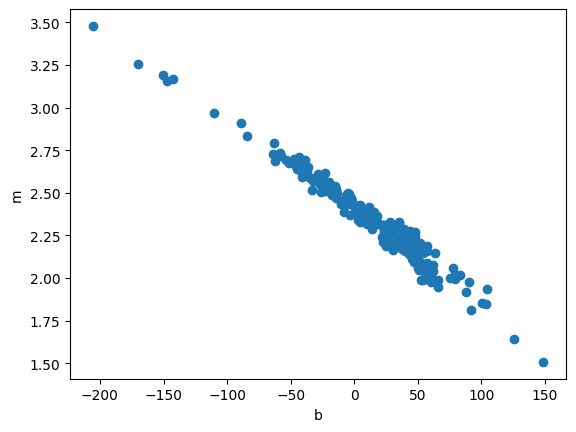

The two parameters seem to be highly (negatively) correlated.


In [45]:
fig, ax = plt.subplots()
ax.scatter(b_boot, m_boot)
ax.set_xlabel('b') 
ax.set_ylabel('m') 
plt.show()

print('The two parameters seem to be highly (negatively) correlated.')

*write your answer here*



## Problem 5) 10 points

A set of data are known to correspond to the function

$$f(t; \tau) = 120 \exp (-t/\tau)$$

where $\tau$ is not known a priori. The task is to infer a good value for $\tau$ (i.e., to make a point estimate) and to provide a 68% confidence interval for that estimate. Prior studies indicate that $\tau$ should be in the range $16 < \tau < 18$.

Since $f(t;\tau$ is a function but not a p.d.f., we cannot use a maximum likelihood method (because the likelihood must be a product of p.d.f.s) so we will use a least-squares method.

Execute the cell below to load the data (or copy this into a different progam that you prefer); $t$ represents the time of observations and $y$ represents the value taken on by the function with corresponding uncertainties `sigma_y`.

In [46]:
t = np.array([1.5, 2.5, 3.7, 4.1, 11.2, 
              12.5, 16.3, 21.5, 26.5, 31.5,
              41.5])

y = np.array([110.093, 103.484, 96.732, 94.276, 62.427, 
              57.499, 45.512, 33.824, 25.254, 18.267, 
              13.776])

sigma_y = np.array([0.228, 0.241, 0.259, 0.265, 0.403,
                    0.435, 0.543, 0.738, 0.990, 1.329,
                    2.393])

**Problem 5a**

Define $\chi^2$ as the following: 

$$\chi^2(\tau) = \sum_{i=1}^{N} \frac{(y_i - 120 \exp(-t_i/\tau))^2}{\sigma_{y,i}^2}$$

Find the least-squares esimate of $\tau$ by minimizing $\chi^2$. What is the corresponding minimum value of $\chi^2$ using the estimator for $\tau$, $\hat{\tau}$.

In [47]:
from scipy.optimize import minimize, Bounds 

def f(_t, tau): return 120*np.exp(-_t/tau) 

def chi_sq(params, _t, _y):
    (tau,) = params
    return np.sum((_y-f(_t, tau))**2/sigma_y**2) 

bounds = Bounds(16, 18) 
initial_guess = 16

result = minimize(chi_sq, initial_guess, 
                  args=(t, y), 
                  bounds=bounds
                  )

TAU = result.x

**Problem 5b**

Plot the data as well as the function from the least-squares fit. Does the inferred value of $\tau$ match the data well? 

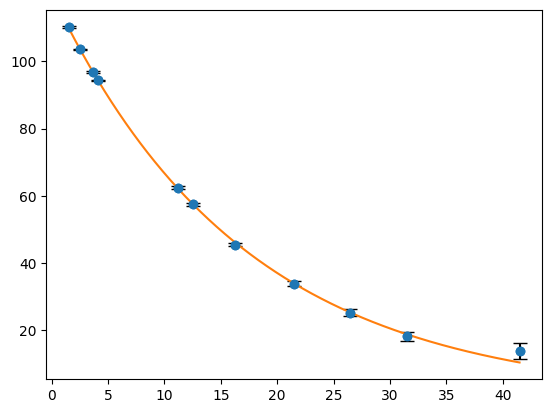

I think the inferred tau matches the data very well


In [48]:
fig, ax = plt.subplots()

ax.scatter(t, y)
ax.errorbar(t, y, yerr=sigma_y, fmt="o", ecolor='black', capsize=5)
x_axis = np.linspace(min(t), max(t), 1000)
y_axis = list(map(lambda _t: 120*np.exp(-_t/TAU), x_axis)) 
ax.plot(x_axis, y_axis)

plt.show() 
print('I think the inferred tau matches the data very well')

**Problem 5c**

How many degrees of freedom are there? 

Based on the page 104 of the textbook, $n_{d}$ is defined as the number of data points minus the number of indepedent parameters, i.e.
$11-1=10$. 



**Problem 5d**

Given the number of degrees of freedom what value of $\chi^2$ would you expect? (In other words, what is the expectation of $\chi^2$ given the number of degrees of freedom?)

*Hint* - no calculation is needed in this instance.

The expectation value of $\chi^2$ would be equal as the number of degrees of freedom, which is 10. 

**Problem 5e**

Compare the expected value for $\chi^2$ to the actual value for $\chi^2$. In this case have you managed to perform a good fit? 

In [49]:
def f(_t, tau): return 120*np.exp(-_t/tau) 
chi_sq = sum(((y - f(t, TAU))**2) / (sigma_y)**2)  
print(chi_sq)
print('In this case this is actually a good fit')

5.278528903288746
In this case this is actually a good fit
